In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import numpy as np

In [3]:
root = './gdrive/My Drive/thesis'
df = pd.read_csv(os.path.join(root, 'Database completo .csv'), header=0, index_col=0, delimiter=';')
df

,MMSE,ETA,SCOLARITA,PATTERN1,PATTERN2,PATTERN3,PATTERN4,PATTERN5,PATTERN6,PATTERN7,PATTERN8,PATTERN9,PATTERN10,PATTERN11,PATTERN12,PATTERN13,PATTERN14,PATTERN15,PATTERN16,PATTERN17,PATTERN18,DGN1
CODICE PERSONA,,,,,,,,,,,,,,,,,,,,,,
GP100118050432-006,28,86,13.0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,NORMALI
BP110118070246-007,28,76,13.0,3,1,3,3,3,3,3,3,3,3,1,3,0,3,3,3,3,1,NORMALI
PC170118310541-010,27,77,8.0,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,NORMALI
EL180118110642-011,29,76,13.0,3,3,3,3,3,3,3,1,3,3,3,3,3,3,3,3,3,3,NORMALI
MM250118040441-015,28,77,NaN,1,3,2,3,3,3,3,0,3,3,0,3,3,3,3,3,3,3,NORMALI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FE011217250735-245,17,82,3.0,1,1,3,3,0,3,1,0,1,0,0,0,1,1,1,0,1,1,DEMENZA
GR191217181038-246,22,79,5.0,2,1,1,0,3,3,3,3,3,2,0,3,3,1,3,3,3,1,DEMENZA
TA141217090439-247,20,78,5.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,DEMENZA


In [4]:
result = pd.read_csv(os.path.join(root, 'miei_result.csv'), header=0, index_col=0)
df = df.loc[result.index.values]
df

,MMSE,ETA,SCOLARITA,PATTERN1,PATTERN2,PATTERN3,PATTERN4,PATTERN5,PATTERN6,PATTERN7,PATTERN8,PATTERN9,PATTERN10,PATTERN11,PATTERN12,PATTERN13,PATTERN14,PATTERN15,PATTERN16,PATTERN17,PATTERN18,DGN1
CODICE PERSONA,,,,,,,,,,,,,,,,,,,,,,
DM120418130343-057,29,75,13.0,3,1,3,3,3,3,3,3,2,3,1,3,3,3,3,3,3,3,MCI
GR270418130633-064,25,85,5.0,3,1,3,0,3,3,3,3,3,3,3,3,3,3,1,3,3,3,MCI
PR131217050539-240,27,78,13.0,1,1,1,0,1,3,2,3,1,1,1,1,0,3,3,3,3,1,DEMENZA
DE090818100428-115,26,90,8.0,3,3,1,0,1,3,3,3,3,1,3,1,3,3,3,3,3,3,DEMENZA
BG200417231036-169,30,81,5.0,3,3,1,3,1,3,3,1,3,3,3,3,3,3,3,3,3,3,NORMALI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BT250517100333-185,20,84,8.0,0,1,1,0,3,0,3,1,3,0,1,1,1,1,1,1,1,0,DEMENZA
CM040718030642-098,NaN,76,8.0,1,1,1,0,3,3,1,3,3,3,3,1,3,3,3,3,1,3,MCI
MM201118110637-131,27,81,5.0,1,1,0,0,3,0,3,3,3,0,0,1,0,1,0,0,0,1,DEMENZA


In [5]:

def label(s):
    if s == 'NORMALI':
        return 0
    if s == 'MCI':
        return 1
    if s == 'DEMENZA':
        return 2

#X_abbate = df.iloc[:, :-1].to_numpy()

X_abbate = result.to_numpy()
y = df.loc[result.index.values,'DGN1'].to_numpy().astype(str)
unique = np.unique(y)
print(unique)
mapping = {}
for i in range(len(unique)):
     mapping[i] = np.where(y == unique[i])[0]
for idx in mapping[2]:
    y[idx] = unique[1]

y_3 = np.array(list(map(label, y)))
print(y_3)

['DEMENZA' 'MCI' 'MCI ' 'NORMALI']
[1 1 2 2 0 2 2 2 2 1 1 1 1 1 0 1 0 0 1 1 1 2 1 1 2 1 1 2 1 0 2 2 2 1 1 1 1
 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1
 0 1 1 1 1 2 1 2 2 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 2 1 2 1 1 1 0 1 0
 1 2 1 1 0 0 1 1 0 1 2 0 2 2 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1
 0 2 1 1 1 1 1 2 1 2 2 2 2 2 2 2 1 2 2 2 2 1 1 1 2 2 2 2 2 1 1 2 1 1 2 1 1
 1 1 2 1 2 2 1 1 2 0 1 1 1 1 2 2 2 2 2 2 2 2 1 2 1 2 1 2 1 1 1 2 1 2 1 2 1
 0]


[[3 1 3 ... 3 3 3]
 [3 1 3 ... 3 3 3]
 [1 1 1 ... 3 3 1]
 ...
 [1 0 1 ... 0 3 0]
 [1 3 1 ... 2 1 1]
 [3 1 1 ... 2 1 3]]
[47 47 27 41 44 25 34 36 30 28 22 29 35 38 47 33 47 35 47 27 35 23 39 31
 22 36 34 39 46 44 32 16 28 49 33 46 48 35 48 49 45 29 28 36 34 44 45 51
 52 40 49 49 40 41 51 35 36 40 40 41 18 28 54 53 45 39 44 34 25 51 36 46
 32 17 47 48 39 39 34 49 27 28 44 28 37 42 31 38 36 41 26 44 44 44 46 43
 40 45 46 43 30 23 30 26 53 45 47 47 49 34 45 53 37 43 49 44 49 33 32 44
 40 36 49 24 42 45 39 34 38 29 42 48 26 35 21 28 28 48 31 35 49 43 25 45
 26 54 46 31 44 28 39 29 28 18 13 13 12 17 15 15 17 27  9 17 23  7  6 24
  4 13 28 16 21 21 15 20  8 17 16 18 25  2  9 27 24 28 28 12 23  8 42 26
 18 11 44 13 31 31 21 28  2 19 18 21 22 11  9 23  8  6 19 18  2 15 22 26
  8 26 22 25 17 26 30]
norm: [44 47 47 35 44 49 45 34 51 52 49 36 40 54 44 51 46 47 38 43 45 49 45 44
 49 44 49 44 44 30]
MCI: [47 47 28 22 29 35 38 33 47 27 35 39 31 36 34 46 49 33 46 48 35 48 29 28
 36 44 45 40 49 40 41 5

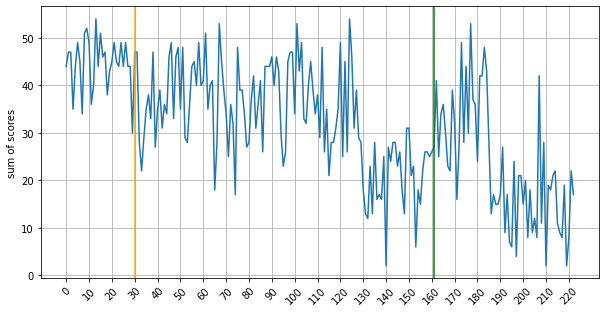

In [6]:



print(X_abbate)
X_abbate_s = np.sum(X_abbate, axis=1)
#X_abbate_s = X_abbate
print(X_abbate_s)

norm = X_abbate_s[y_3 == 0]
MCI = X_abbate_s[y_3 == 1]
dem = X_abbate_s[y_3 == 2]
print('norm: {}'.format(norm))
print('MCI: {}'.format(MCI))
print('dem: {}'.format(dem))
patients = np.arange(X_abbate_s.shape[0])

plt.figure(figsize=(10, 5))
plt.plot(patients, np.concatenate((norm, MCI, dem)))
plt.axvline(x=norm.shape[0], color='orange')
plt.axvline(x=norm.shape[0]+MCI.shape[0], color='green')
plt.xticks(patients[::10], rotation=45)
plt.ylabel('sum of scores')
plt.grid(True)
plt.show()